<a href="https://colab.research.google.com/github/panditamey/BrainTumourPrediction/blob/main/BrainTumour.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q kaggle

from google.colab import files
files.upload()

In [7]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list

mkdir: cannot create directory ‘/root/.kaggle’: File exists
ref                                                           title                                          size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------  ---------------------------------------------  ----  -------------------  -------------  ---------  ---------------  
salvatorerastelli/spotify-and-youtube                         Spotify and Youtube                             9MB  2023-03-20 15:43:25            980         35  1.0              
dgoenrique/netflix-movies-and-tv-shows                        Netflix Movies and TV Shows                     2MB  2023-03-13 18:49:00            709         23  1.0              
rajkumarpandey02/list-of-countries-by-gdp-sector-composition  List of Countries by GDP Sector Composition     8KB  2023-03-20 04:42:10            953         33  1.0              
datascientistanna/customers-dataset     

In [8]:
!kaggle datasets download -d navoneel/brain-mri-images-for-brain-tumor-detection

 60% 9.00M/15.1M [00:00<00:00, 76.0MB/s]
100% 15.1M/15.1M [00:00<00:00, 109MB/s] 


In [9]:
!mkdir dataset

In [ ]:
!unzip brain-mri-images-for-brain-tumor-detection.zip -d dataset

In [11]:
import os
import keras 
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder 

In [ ]:
encoder = OneHotEncoder()
encoder.fit([[0], [1]]) 


In [16]:
data = []
paths = []
result = []

for r, d, f in os.walk(r'/content/dataset/yes'):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())

In [17]:
paths = []
for r, d, f in os.walk(r"/content/dataset/no"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())

In [18]:
data = np.array(data)
data.shape

(139, 128, 128, 3)

In [19]:
result = np.array(result)
result = result.reshape(139,2)

In [20]:
x_train,x_test,y_train,y_test = train_test_split(data, result, test_size=0.2, shuffle=True, random_state=0)

In [21]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(2, 2), input_shape=(128, 128, 3), padding = 'Same'))
model.add(Conv2D(32, kernel_size=(2, 2),  activation ='relu', padding = 'Same'))


model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))
model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss = "categorical_crossentropy", optimizer='Adamax')
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      416       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4128      
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 64, 64, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        8

In [26]:
print(x_train.shape,y_train.shape)

(111, 128, 128, 3) (111, 2)


In [27]:
history = model.fit(x_train, y_train, epochs = 30, batch_size = 40, verbose = 1,validation_data = (x_test, y_test))

Epoch 1/30
3/3 [==============================] - 13s 4s/step - loss: 20.8596 - val_loss: 58.1216
Epoch 2/30
3/3 [==============================] - 18s 6s/step - loss: 13.7906 - val_loss: 56.2511
Epoch 3/30
3/3 [==============================] - 10s 4s/step - loss: 10.5423 - val_loss: 21.6525
Epoch 4/30
3/3 [==============================] - 8s 3s/step - loss: 4.6800 - val_loss: 16.8180
Epoch 5/30
3/3 [==============================] - 10s 3s/step - loss: 2.9218 - val_loss: 13.3176
Epoch 6/30
3/3 [==============================] - 10s 4s/step - loss: 1.0693 - val_loss: 18.0469
Epoch 7/30
3/3 [==============================] - 10s 3s/step - loss: 2.5344 - val_loss: 16.2829
Epoch 8/30
3/3 [==============================] - 9s 3s/step - loss: 1.3352 - val_loss: 12.5127
Epoch 9/30
3/3 [==============================] - 10s 3s/step - loss: 0.3892 - val_loss: 16.8998
Epoch 10/30
3/3 [==============================] - 9s 3s/step - loss: 0.7871 - val_loss: 18.5524
Epoch 11/30
3/3 [============

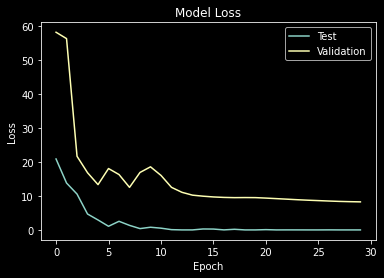

In [28]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

In [29]:
def names(number):
    if number==0:
        return 'Its a Tumor'
    else:
        return 'No, Its not a tumor'

100.0% Confidence This Is No, Its not a tumor


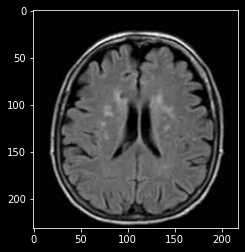

In [32]:
from matplotlib.pyplot import imshow
img = Image.open(r"/content/dataset/brain_tumor_dataset/no/17 no.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is ' + names(classification))

100.0% Confidence This Is A Its a Tumor


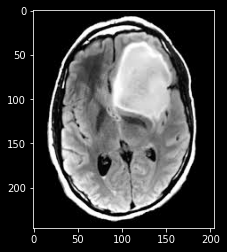

In [33]:
from matplotlib.pyplot import imshow
img = Image.open(r"/content/dataset/brain_tumor_dataset/yes/Y105.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is A ' + names(classification))